In [28]:
import pandas               as pd
import matplotlib.pyplot    as plt
import plotly.express       as px
import geopandas            as gpd
import seaborn              as sns
import folium               


pd.options.display.max_columns = None

# Dataset: Incidents Mobility

Algunas de las columnas son: 

- **source**: Fuente de información de incidentes de movilidad.
- **type**: Tipo de incidentes de movilidad.
- **state**: Estado de incidentes de movilidad.
- **priority**: Prioridad de incidentes de movilidad.
- **gravity**: Gravedad de incidentes de movilidad.
- **class**: Clase de incidentes de movilidad.
- **object**: Objeto de incidentes de movilidad.
- **actor**: Actor de incidentes de movilidad.
- **public**: Indica si es publico.
- **latitude**: Latitud del incidente.
- **longitude**: Longitud del incidente.
- **location**: Localización del incidente.
- **id_user**: Identificador del usuario relacionado al incidente. 
- **name_user**: Nombre del usuario relacionado al incidente. 
- **time_stamp**: Estampa de tiempo del incidente de movilidad.
- **implicated**: Implicado en el incidente de movilidad.
- **updatedate**: Fecha de actualización del incidente de movilidad.
- **orient**: Orientación del incidente de movilidad.
- **incident_time**: Momento del incidente de movilida.
- **name_user_modified**: Nombre del usuario modificado.
- **type_other**: Campo de texto libre. Se utiliza cuando un incidente es relacionado con una manifestación.

In [29]:
incidents_mobility = pd.read_csv('../0_datasets/incidents/incidents_mobility_May2022.csv', parse_dates=['time_stamp', 'updatedate', 'incident_time'])
incidents_mobility.head()

id  source  type  state  priority  gravity  class  object  actor  \
0  57518      56   6.0     71        54     25.0      1     NaN    NaN   
1  57519      56   6.0     71        53     25.0      1     NaN    NaN   
2  57520      56   7.0     71        53     25.0      1    43.0    NaN   
3  57521      56   6.0     71        53     25.0      1     NaN    NaN   
4  57522      56   6.0     71        53     25.0      1     NaN    NaN   

   public  latitude  longitude  location  id_user      name_user  \
0    True  4.705279 -74.127686  Engativa       28  Aleyda Wagner   
1    True  4.600571 -74.143379   Kennedy       28  Aleyda Wagner   
2    True  4.647777 -74.137123   Kennedy       28  Aleyda Wagner   
3    True  4.720405 -74.075302      Suba       28  Aleyda Wagner   
4    True  4.614258 -74.167252   Kennedy       28  Aleyda Wagner   

           time_stamp  broker_id  implicated                        address  \
0 2022-05-01 00:00:22        NaN         2.0         Carrera 110 Calle 69 B   
1 2022-05-01 00:02:19      309.0         3.0     Carrera 68I Calle 43 B SUR   
2 2022-05-01 00:10:21        NaN         1.0          Calle 11 Carrera 79 a   
3 2022-05-01 00:11:10      308.0         2.0          Av. Boyacá  Calle 129   
4 2022-05-01 00:11:53      304.0         2.0  Transversal 78 J Calle 49 SUR   

           updatedate  zone_id  orient  require_support       incident_time  \
0 2022-05-01 00:37:47      146     143              NaN 2022-04-30 23:59:00   
1 2022-05-01 00:38:07      147     142              NaN 2022-04-30 23:54:00   
2 2022-05-01 01:43:44      147     144              NaN 2022-05-01 00:08:00   
3 2022-05-01 01:44:04      146     143              NaN 2022-05-01 00:10:00   
4 2022-05-01 01:44:28      147     143              NaN 2022-05-01 00:11:00   

   id_user_modified name_user_modified type_others  
0              28.0      Aleyda Wagner         NaN  
1              28.0      Aleyda Wagner         NaN  
2              28.0      Aleyda Wagner         NaN  
3              28.0      Aleyda Wagner         NaN  
4              28.0      Aleyda Wagner         NaN

In [30]:
incidents_mobility.info

<bound method DataFrame.info of           id  source  type  state  priority  gravity  class  object  actor  \
0      57518      56   6.0     71        54     25.0      1     NaN    NaN   
1      57519      56   6.0     71        53     25.0      1     NaN    NaN   
2      57520      56   7.0     71        53     25.0      1    43.0    NaN   
3      57521      56   6.0     71        53     25.0      1     NaN    NaN   
4      57522      56   6.0     71        53     25.0      1     NaN    NaN   
...      ...     ...   ...    ...       ...      ...    ...     ...    ...   
10865  68383      56   6.0     69        54     26.0      1     NaN    NaN   
10866  68384      56   9.0     69        53     26.0      1     NaN    NaN   
10867  68385      56   6.0     69        53     25.0      1     NaN    NaN   
10868  68386      56   6.0     69        54     25.0      1     NaN    NaN   
10869  68387      56   6.0     69        54     25.0      1     NaN    NaN   

       public  latitude  longit

**Observaciones**

- `type` parece ser una referencia a un identificador en la tabla `indicents_categories`.
- `state` es una referencia a el `category_state` de la tabla `incidents_categories`.
- `priority` y `gravity` no significan nada por si solos, deben ser referencias a otras tablas.
- todos los valores de la columna `public` son True.
- `location` parece corresponder a la localidad, hay typos en los nombres de algunas localidades.
- No se tiene información para determinar a que usuario hacen referencia `id_user` y `user`.
- `broker_id` parece ser un identificador del corredor vial.
- `require_support` y `actor` no tienen ningun valor.
- `type_others` parece tener observaciones adicionales del incidente.

In [31]:
# Data Cleansing
# Location missing - Loation Missing
# San Cristóbal -San Cristobal

incidents_mobility.replace(['Loation Missing','San Cristóbal'],
                           ['Location missing', 'San Cristobal'],
                           inplace=True)

Seleccionamos las columnas relevantes

In [32]:
incidents_mobility = incidents_mobility[['id', 
       # 'source', 
       # 'type', 
       # 'state', 
       # 'priority', 'gravity',
       # 'class',
       # 'object', 'actor',
       # 'public', 
       'latitude', 'longitude', 'location',
       # 'id_user', 
       # 'name_user', 
       'time_stamp', 
       # 'broker_id', 
       'implicated',
       'address', 'updatedate',
       # 'zone_id', 'orient', 
       # 'require_support',
       'incident_time', 
       # 'id_user_modified', 'name_user_modified', 'type_others'
       ]]
incidents_mobility.head()

id  latitude  longitude  location          time_stamp  implicated  \
0  57518  4.705279 -74.127686  Engativa 2022-05-01 00:00:22         2.0   
1  57519  4.600571 -74.143379   Kennedy 2022-05-01 00:02:19         3.0   
2  57520  4.647777 -74.137123   Kennedy 2022-05-01 00:10:21         1.0   
3  57521  4.720405 -74.075302      Suba 2022-05-01 00:11:10         2.0   
4  57522  4.614258 -74.167252   Kennedy 2022-05-01 00:11:53         2.0   

                         address          updatedate       incident_time  
0         Carrera 110 Calle 69 B 2022-05-01 00:37:47 2022-04-30 23:59:00  
1     Carrera 68I Calle 43 B SUR 2022-05-01 00:38:07 2022-04-30 23:54:00  
2          Calle 11 Carrera 79 a 2022-05-01 01:43:44 2022-05-01 00:08:00  
3          Av. Boyacá  Calle 129 2022-05-01 01:44:04 2022-05-01 00:10:00  
4  Transversal 78 J Calle 49 SUR 2022-05-01 01:44:28 2022-05-01 00:11:00

### Data visualization

Incidents by day of the month

/tmp/ipykernel_946/2825249563.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



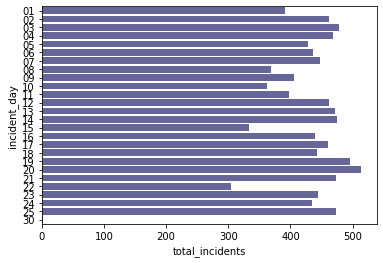

In [33]:
incidents_mobility['incident_day'] = incidents_mobility["incident_time"].dt.to_period('d').dt.strftime('%d')
incidents_x_day = incidents_mobility.groupby(by=['incident_day']).size().rename('total_incidents').to_frame().reset_index()

sns.barplot(data=incidents_x_day,
            y='incident_day',
            x='total_incidents',
            orient='h',
            color='blue',
            saturation=0.2
            );

/tmp/ipykernel_946/1992412733.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



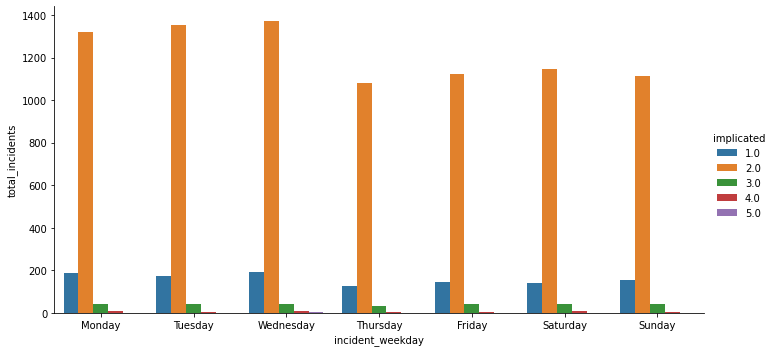

In [34]:
# Incidents by day of the week and implicated
weekdays = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

incidents_mobility['incident_weekday'] = incidents_mobility["incident_time"].dt.weekday
incidents_x_weekday = incidents_mobility.groupby(by=['incident_weekday','implicated']).size()\
    .rename('total_incidents').to_frame().reset_index()
incidents_x_weekday.incident_weekday = incidents_x_weekday.incident_weekday.map(weekdays)

sns.catplot(data=incidents_x_weekday,
            x='incident_weekday',
            y='total_incidents',
            hue='implicated',
            kind='bar',
            aspect=2
            );

/tmp/ipykernel_946/2780648820.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



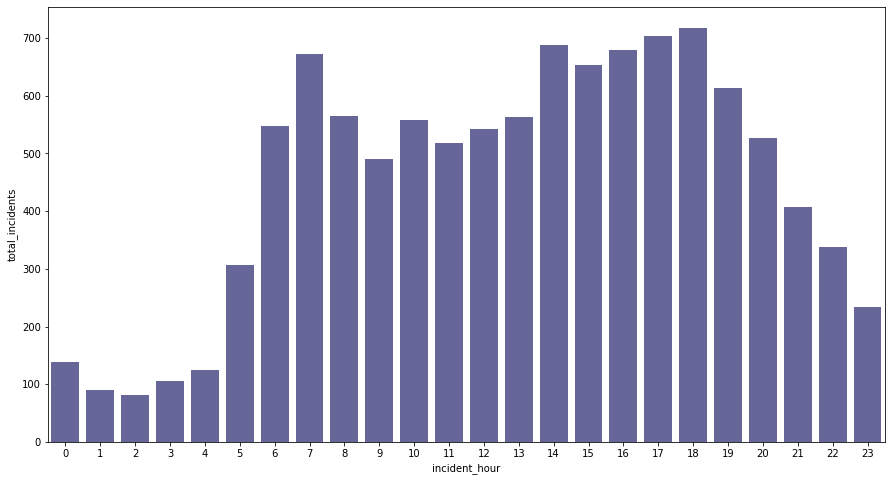

In [35]:
# Incidents by hour and implicated

incidents_mobility['incident_hour'] = incidents_mobility["incident_time"].dt.hour
incidents_x_hour = incidents_mobility.groupby(by=['incident_hour']).size()\
    .rename('total_incidents').to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(data=incidents_x_hour,
            x='incident_hour',
            y='total_incidents',
            color='blue',
            saturation=0.2
            );

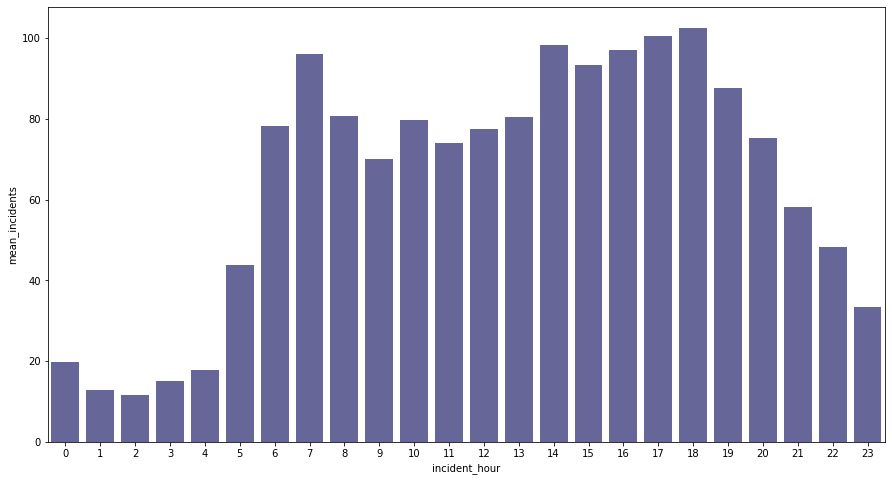

In [36]:
# Mean Incidents by hour
incidents_x_hour_mean = incidents_mobility.groupby(by=['incident_weekday','incident_hour']).size()\
    .rename('mean_incidents').to_frame().reset_index()\
    .groupby(by=['incident_hour']).mean().reset_index()


plt.figure(figsize=(15,8))
sns.barplot(data=incidents_x_hour_mean,
            x='incident_hour',
            y='mean_incidents',
            color='blue',
            saturation=0.2
            );

In [37]:
# Comparison between total incidentx and mean incidents per hour
incidents_x_hour.merge(incidents_x_hour_mean,
    how='left',
    left_on='incident_hour',
    right_on='incident_hour')[['incident_hour', 'total_incidents','mean_incidents']]

incident_hour  total_incidents  mean_incidents
0               0              139       19.857143
1               1               90       12.857143
2               2               82       11.714286
3               3              106       15.142857
4               4              124       17.714286
5               5              306       43.714286
6               6              547       78.142857
7               7              673       96.142857
8               8              565       80.714286
9               9              491       70.142857
10             10              558       79.714286
11             11              519       74.142857
12             12              543       77.571429
13             13              564       80.571429
14             14              688       98.285714
15             15              654       93.428571
16             16              680       97.142857
17             17              704      100.571429
18             18              718      102.571429
19             19              614       87.714286
20             20              526       75.142857
21             21              407       58.142857
22             22              338       48.285714
23             23              234       33.428571

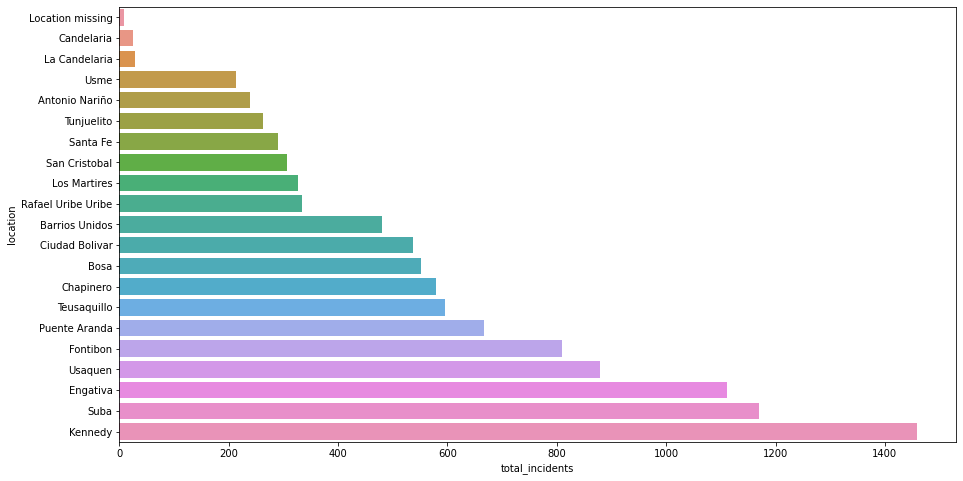

In [38]:
incidents_location_implicated = incidents_mobility.groupby(by=['location']).size()\
                                                                           .rename('total_incidents')\
                                                                           .to_frame().reset_index()\
                                                                           .sort_values(by="total_incidents")

plt.figure(figsize=(15,8))
sns.barplot(data=incidents_location_implicated,
            x='total_incidents',
            y='location',
            );

# Dataset: incidents_mobility_description

Este dataset no parece tener mucha relevancia para nuestros objetivos.

In [39]:
incidents_mobility_description = pd.read_csv('../0_datasets/incidents/incidents_mobility_description.csv')
incidents_mobility_description.head()

id  id_incident                                        description  \
0   1            1  2021-04-23 09:43 <Fecha 2021-04-23 y hora 11:2...   
1   2            2  2021-04-27 16:29 <Fecha 2021-04-27 y hora 17:3...   
2   3            1  Bomberos atiende la novedad y la vía se encuen...   
3   4            1  2021-04-23 09:43 <Fecha 2021-04-29 y hora 11:2...   
4   5            1  2021-04-23 09:43 <Fecha 2021-04-29 y hora 11:3...   

   id_user                          name_user           time_stamp  
0        3                     SKG Tecnología  2021-04-23 11:25:46  
1       23                       Javier Reyes  2021-04-27 17:31:42  
2       24  hrvelandia@movilidadbogota.gov.co  2021-04-29 11:28:20  
3       24  hrvelandia@movilidadbogota.gov.co  2021-04-29 11:29:39  
4       24  hrvelandia@movilidadbogota.gov.co  2021-04-29 11:37:46

# Dataset: incidents_categories

`incidents_categories` no tiene ninguna columna que identifique el incidente.

In [40]:
incidents_categories = pd.read_csv('../0_datasets/incidents/incidents_categories.csv')
incidents_categories

id  category_type  category_state               category_name  parent_id
0      1              2            True                   Siniestro        NaN
1      2              2            True                      Varado        NaN
2      3              2            True              Semaforización        NaN
3      4              2            True               Manifestación        NaN
4      5              2            True            Incidente en vía        NaN
..   ...            ...             ...                         ...        ...
207  179              4            True  Con fatalidad hospitalaria      173.0
208  180              4            True               Con lesionado      173.0
209  328              6            True      Alcantarilla destapada        NaN
210  329              3            True                 Caída poste        5.0
211  330              6            True                  Montacarga        NaN

[212 rows x 5 columns]

In [41]:
incidents_categories_new = incidents_categories.merge(
    incidents_categories,
    how='left',
    left_on='parent_id',
    right_on='id')\
    [['id_x','category_name_x','category_name_y']]\
    .rename(columns={'id_x':'id', 'category_name_x':'subcategory', 'category_name_y': 'category'}
    )
incidents_categories_new['category'] = incidents_categories_new["category"].combine_first(incidents_categories_new.subcategory)
incidents_categories_new.head()


id       subcategory          category
0   1         Siniestro         Siniestro
1   2            Varado            Varado
2   3    Semaforización    Semaforización
3   4     Manifestación     Manifestación
4   5  Incidente en vía  Incidente en vía

# Dataset: incidents_implicated

In [42]:
incidents_implicated = pd.read_csv('../0_datasets/incidents/incidents_implicated.csv')
incidents_implicated.head()

id  incident_id  implicated_type  injured_count  dead_count
0  95           24             97.0              0           0
1  96           24             95.0              0           0
2   3            3            105.0              1           1
3   4            3            155.0              1           0
4  97           26            103.0              0           0

# Combining the datasets

In [43]:
incidents = incidents_mobility.merge(
    incidents_implicated[['incident_id','injured_count','dead_count']],
    how='left',
    left_on='id',
    right_on='incident_id')[['id','incident_time', 'time_stamp','implicated','injured_count','dead_count','latitude','longitude','address','location']]

incidents.head()

id       incident_time          time_stamp  implicated  injured_count  \
0  57518 2022-04-30 23:59:00 2022-05-01 00:00:22         2.0            0.0   
1  57518 2022-04-30 23:59:00 2022-05-01 00:00:22         2.0            0.0   
2  57519 2022-04-30 23:54:00 2022-05-01 00:02:19         3.0            0.0   
3  57519 2022-04-30 23:54:00 2022-05-01 00:02:19         3.0            0.0   
4  57519 2022-04-30 23:54:00 2022-05-01 00:02:19         3.0            0.0   

   dead_count  latitude  longitude                     address  location  
0         0.0  4.705279 -74.127686      Carrera 110 Calle 69 B  Engativa  
1         0.0  4.705279 -74.127686      Carrera 110 Calle 69 B  Engativa  
2         0.0  4.600571 -74.143379  Carrera 68I Calle 43 B SUR   Kennedy  
3         0.0  4.600571 -74.143379  Carrera 68I Calle 43 B SUR   Kennedy  
4         0.0  4.600571 -74.143379  Carrera 68I Calle 43 B SUR   Kennedy

In [44]:
px.scatter_mapbox(incidents,
                  lat='latitude',
                  lon='longitude',
                  color='implicated',
                  color_continuous_scale=px.colors.cyclical.IceFire,
                  zoom=9,
                  mapbox_style='open-street-map',
                  hover_data=['id','address','location','injured_count','dead_count'],
                  )

**********

# Dataset: agents_May2022

In [45]:
agents_history = pd.read_csv('../0_datasets/agents/agents_May2022.csv', parse_dates=['read_time', 'time_stamp', 'server_date_time'])
agents_history.head()

id           dev_id           read_time          time_stamp  \
0  1651381596  868033050089715 2022-05-01 00:06:36 2022-05-01 00:01:40   
1  1651381596  868033050102534 2022-05-01 00:06:36 2022-05-01 00:01:42   
2  1651381596  868033050103334 2022-05-01 00:06:36 2022-05-01 00:02:59   
3  1651381596  868033050099326 2022-05-01 00:06:36 2022-05-01 00:04:31   
4  1651381596  868033050102682 2022-05-01 00:06:36 2022-05-01 00:05:06   

     server_date_time  stat_type     speed dev_name  altitude  heading  \
0 2022-05-01 00:06:36        NaN  0.053087    89008         0        0   
1 2022-05-01 00:06:36        NaN  0.000000    92451         0        0   
2 2022-05-01 00:06:36        NaN  1.635883    92229         0        0   
3 2022-05-01 00:06:36        NaN  0.000000    41325         0        0   
4 2022-05-01 00:06:36        NaN  0.000000    94387         0        0   

  grp_name                                               geom  \
0      S60  0101000020E61000000708E6E8F18652C06ED685C4E234...   
1      S60  0101000020E6100000393F6AB86D8952C048B02770A199...   
2      S60  0101000020E6100000F3959B03DF8852C02C78769E1D3D...   
3      S60  0101000020E6100000C5C6BC8E388852C070044E5BC858...   
4      S60  0101000020E61000001A8C6C42B58C52C0683B4B35585D...   

            localidad  localidad_id  latitude  longitude     serialnumber  \
0  RAFAEL URIBE URIBE            18  4.551646 -74.108515  868033050089715   
1             KENNEDY             8  4.650030 -74.147322  868033050102534   
2      CIUDAD BOLIVAR            19  4.559683 -74.138612  868033050103334   
3  RAFAEL URIBE URIBE            18  4.586702 -74.128452  868033050099326   
4            Engativa            10  4.591157 -74.198563  868033050102682   

   devicegroupid  
0              6  
1              6  
2              6  
3              6  
4              6

In [46]:
agents_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97608 entries, 0 to 97607
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                97608 non-null  int64         
 1   dev_id            97608 non-null  int64         
 2   read_time         97608 non-null  datetime64[ns]
 3   time_stamp        97608 non-null  datetime64[ns]
 4   server_date_time  97608 non-null  datetime64[ns]
 5   stat_type         0 non-null      float64       
 6   speed             97608 non-null  float64       
 7   dev_name          97608 non-null  object        
 8   altitude          97608 non-null  int64         
 9   heading           97608 non-null  int64         
 10  grp_name          97608 non-null  object        
 11  geom              97608 non-null  object        
 12  localidad         97608 non-null  object        
 13  localidad_id      97608 non-null  int64         
 14  latitude          9760

In [47]:
# The first 10 values of agents
agents_history.id.unique()[:10]

array([1651381596, 1651382197, 1651382799, 1651383400, 1651384001,
       1651384602, 1651385204, 1651385805, 1651386405, 1651387006])

In [48]:
agents_history.localidad.unique().tolist()

['RAFAEL URIBE URIBE',
 'KENNEDY',
 'CIUDAD BOLIVAR',
 'Engativa',
 'PUENTE ARANDA',
 'USME',
 'LOS MARTIRES',
 'BOSA',
 'TUNJUELITO',
 'USAQUEN',
 'SAN CRISTOBAL',
 'CHAPINERO',
 'FONTIBON',
 'ENGATIVA',
 'SUBA',
 'CANDELARIA',
 'TEUSAQUILLO',
 'SANTA FE',
 'ANTONIO NARIÃ‘O',
 'BARRIOS UNIDOS',
 'ANTONIO NARIﾃ前',
 'ANTONIO NARIÑO']

In [49]:
# Places that one agent has visited
agents_history[agents_history.id == 1651381596][['time_stamp', 'localidad']]\
.sort_values(by='time_stamp').reset_index(drop=True).head(20)

time_stamp           localidad
0  2022-05-01 00:01:40  RAFAEL URIBE URIBE
1  2022-05-01 00:01:42             KENNEDY
2  2022-05-01 00:01:47  RAFAEL URIBE URIBE
3  2022-05-01 00:01:52      CIUDAD BOLIVAR
4  2022-05-01 00:01:55             KENNEDY
5  2022-05-01 00:01:56             KENNEDY
6  2022-05-01 00:02:08       PUENTE ARANDA
7  2022-05-01 00:02:09          TUNJUELITO
8  2022-05-01 00:02:42                BOSA
9  2022-05-01 00:02:58             KENNEDY
10 2022-05-01 00:02:59      CIUDAD BOLIVAR
11 2022-05-01 00:02:59  RAFAEL URIBE URIBE
12 2022-05-01 00:03:26                USME
13 2022-05-01 00:03:43       PUENTE ARANDA
14 2022-05-01 00:03:59       PUENTE ARANDA
15 2022-05-01 00:04:11            FONTIBON
16 2022-05-01 00:04:14           CHAPINERO
17 2022-05-01 00:04:24  RAFAEL URIBE URIBE
18 2022-05-01 00:04:31  RAFAEL URIBE URIBE
19 2022-05-01 00:04:54             USAQUEN

In [50]:
# Agents with most records in the history dataset
agents_history.groupby(by=['id']).size().sort_values(ascending=False).head(10)

id
1651700515    152
1653499909    146
1652996918    137
1653431887    133
1653505377    132
1653073934    126
1652982478    124
1653490292    124
1652302015    122
1653508384    120
dtype: int64

In [51]:
#agents_history[agents_history['localidad']==agents_history['localidad'].value_counts().index[0]]
# text = ' '.join(agents_history['localidad'])
# wordcloud = WordCloud(max_font_size=100, max_words=100000, background_color='white').generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show();

In [52]:
# The beginning and end of this dataset
print(f'The oldest record has the timestamp: {min(agents_history.time_stamp)}\nThe newest record has the timestamp: {max(agents_history.time_stamp)}')

The oldest record has the timestamp: 2022-05-01 00:01:40
The newest record has the timestamp: 2022-05-25 23:54:39
